In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd 

filename = '/content/drive/MyDrive/Coding Dojo/08 Week 8: Gradient Boosting Alg. /healthcare-dataset-stroke-data.csv'
df = pd.read_csv(filename)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Pre-processing Steps (Project 2, Part 2) 

**Delete unnecessary columns**

Remove ID column (unique identifier) to prohibit the model from over training 

In [65]:
df.drop(columns = 'id', inplace = True)

In [66]:
df.head() #print the first 5 rows of dataset to confirm ID column is missing

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Delete duplicate rows**

In [67]:
df.duplicated().sum() #add the number of duplicated rows 

0

There are no duplicates to drop 

**Identify and addressed missing values**

In [68]:
df.isna().sum() #count the number of missing values per column

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Rule of thumb - dont drop more than 10% of data 

Let's see what percentage the missing 201 comprise of the whole dataset

In [69]:
#find the percentage of missing data in the entire dataset
(201/len(df)*100)

3.9334637964774952

the missing values only comprise ~4% of the dataset so droping them wont effect our dataset terribly AND reduces us from making errors trying to fill these values in 

In [70]:
#display the original length of the dataset
len(df)

5110

In [71]:
df.dropna(inplace = True) #drop missing values 

In [72]:
#display new length of the dataset after missing values have been droped
len(df)

4909

**Identify and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)**

In [73]:
df['gender'].value_counts() #display unique values and their occurance for gender column

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [74]:
df['ever_married'].value_counts() #display unique values and their occurance for marriage column

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [75]:
df['work_type'].value_counts() #display unique values and their occurance for work type column

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [76]:
df['Residence_type'].value_counts() #display unique values and their occurance for residence column

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [77]:
df['smoking_status'].value_counts() #display unique values and their occurance for smoking status column

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [78]:
df.describe() #display the statistical outputs for numerical columns 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


lowest age of 0.08 does not make sense for this survey

In [79]:
df['age'].value_counts()

78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64

In [80]:
df[df['age'] < 7].head(100) #display the first 100 values of thoes under age '7'

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,Male,4.00,0,0,No,children,Rural,79.17,20.0,Unknown,0
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
369,Female,4.00,0,0,No,children,Rural,93.25,16.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1609,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1632,Female,1.48,0,0,No,children,Rural,55.51,18.5,Unknown,0


these all appear to be kids, so droping these values are most likley not needed

**Produce univariate visuals for the target and all features**

**Identify outliers**

In [81]:
import seaborn as sns 

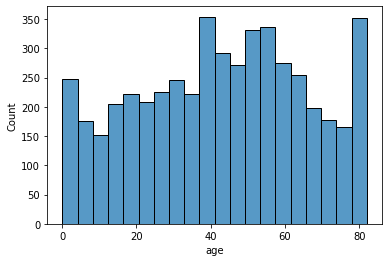

In [82]:
sns.histplot(df, x='age');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


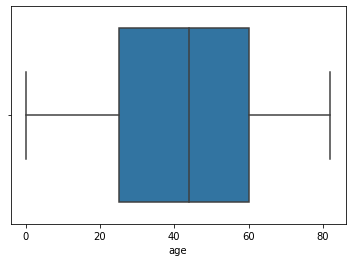

In [83]:
sns.boxplot(df['age']);

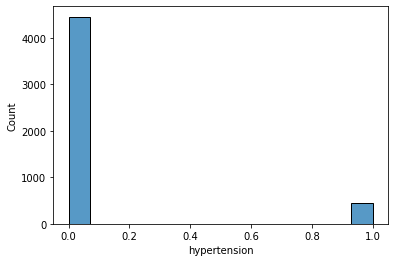

In [84]:
sns.histplot(df, x='hypertension');

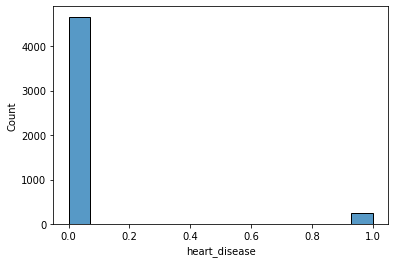

In [85]:
sns.histplot(df, x='heart_disease');

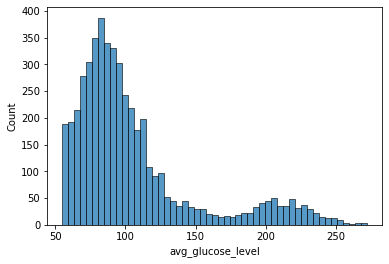

In [86]:
	  sns.histplot(df, x='avg_glucose_level');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


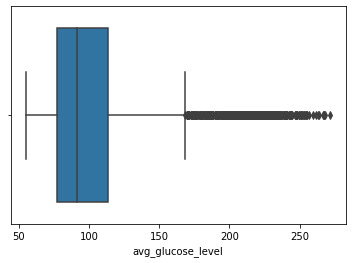

In [87]:
sns.boxplot(df['avg_glucose_level']);

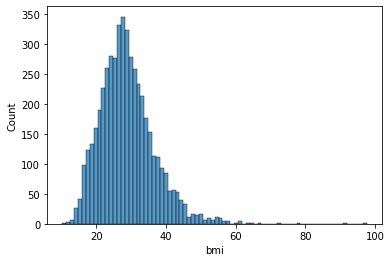

In [88]:
sns.histplot(df,x='bmi');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


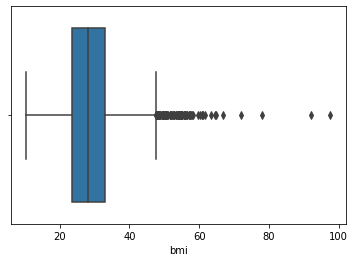

In [89]:
sns.boxplot(df['bmi']);

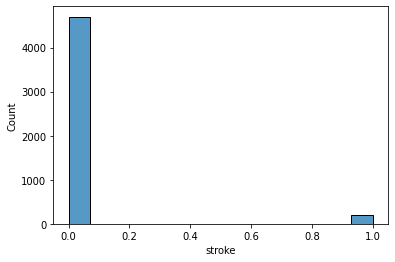

In [90]:
sns.histplot(df,x = 'stroke');

**Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another**

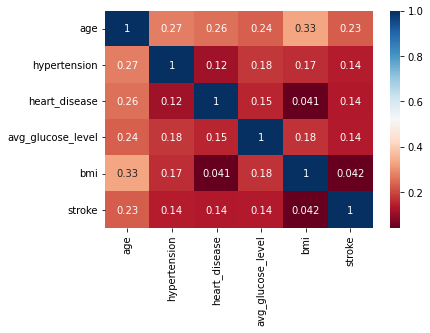

In [91]:
ax = sns.heatmap(df.corr(), cmap = 'RdBu', annot = True)

moderate correlation between 'bmi' and 'age', week correlation between the remaining variables. We do see there is more of a correlation between stroke and age than any other variable with stroke- but the strength of the correlation is realivivly weak still. 

# Model Development Phase (Project 2, Part 4) 

goal of the project: PREDICT whether a patient is likely to get stroke (binary: yes (1) or no (0)) based on clinical features 

**Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model)**

In [92]:
#get the preprocessing steps in 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 589.3+ KB


Numerical categories: Age, ave_glucose_level, bmi

Categorical categories: all else 



This project will be using classification trees since we are predicting: stroke or no stroke 

In [93]:
df['ever_married'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [94]:
from sklearn.model_selection import train_test_split #import train test split libary

X = df.drop(columns = 'stroke') #assign all columns besides stroke status as our features (X)
y = df['stroke'] #assign stroke status as target variable (y)
#(there are no 'unique identifiers' that need to be droped)

#establish train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #assign 42 for reproduceability

In [95]:
#get some more libaries in! 
from sklearn.compose import make_column_selector, make_column_transformer #import column selector libary
from sklearn.preprocessing import OneHotEncoder,StandardScaler #import OneHotEncoder and standard scaler libary
from sklearn.impute import SimpleImputer #import SimpleImputer

In [96]:
#one hot encode categorical features! 

#first step - split categorical features from numerical ones
cat_selector = make_column_selector(dtype_include='object') #instantiate column selector for categorical data
num_selector = make_column_selector(dtype_include='number') #instantiate column selector for numerical data

ohe_encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore') #instantiate one hot encoder 

In [97]:
scaler = StandardScaler() #standardize numerical data

In [98]:
cat_tuple = (ohe_encoder, cat_selector) #create categorical tuple to feed into transformer
num_tuple = (scaler, num_selector) #create numerical tuple to feed into transformer

In [99]:
column_transformer = make_column_transformer(num_tuple, 
                                             cat_tuple, remainder='passthrough') #instantiate the column transformer

In [100]:
from sklearn.tree import DecisionTreeClassifier #import dec. tree class. libary
from sklearn.neighbors import KNeighborsClassifier #import KNN libary
from sklearn.linear_model import LogisticRegression #import log. regression libary

In [101]:
dec_tree = DecisionTreeClassifier(random_state = 42) #make an instance of a basic dec. tree classifier
knn = KNeighborsClassifier(n_neighbors=1) #make an instance of a basic KNN 
logreg = LogisticRegression(C = 1000) #make an instance of a basic Log. reg. model

In [102]:
#use a PCA for all models that captures 95% of the variance in data 
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [103]:
from sklearn.pipeline import make_pipeline
dec_tree_pipe = make_pipeline(column_transformer, pca, dec_tree) #create a decision tree pipeline 
knn_pipe = make_pipeline(column_transformer, pca, knn) #create a knn pipe 
logreg_pipe = make_pipeline(column_transformer, pca, logreg) #create a log. regression pipe

**Decision Tree**

In [104]:
#create a basic decision tree 
dec_tree_pipe.fit(X_train, y_train) #fit data to tree
print(f'DT accuracy for the training data is {dec_tree_pipe.score(X_train, y_train)*100} %')
print(f'DT accuracy for the test data (unseen by model) is {dec_tree_pipe.score(X_test, y_test)*100} %')

DT accuracy for the training data is 100.0 %
DT accuracy for the test data (unseen by model) is 92.10097719869707 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


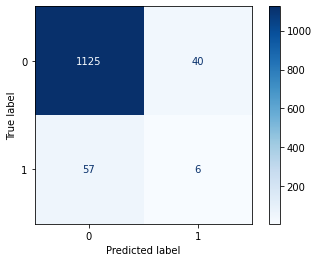

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree_pipe, X_test, y_test, cmap = 'Blues');

A model that is 100% accurate on the training data and 92% accurate on the testing data suggests that it is most likely overfit. 

We also see 57 false negatives and 40 false positives in the above correlation map. 

Lets tune the model!

In [106]:
dec_tree_pipe.get_params() #extracting parameters of the decision tree

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ea583150>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ea583f10>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': False,
 'columntransformer__remainde

In [107]:
change_DT_params = {'decisiontreeclassifier__ccp_alpha' : [0, 0.015, 0.025, 0.035],
              'decisiontreeclassifier__min_samples_leaf' : [1, 5, 10, 20]}

In [108]:
from sklearn.model_selection import GridSearchCV
DT_gs = GridSearchCV(dec_tree_pipe, change_DT_params); #code adapted from mock exam solutions

DT_gs.fit(X_train, y_train) #fit tuned tree to data 

print(f'DT accuracy for the training data is {DT_gs.score(X_train, y_train)*100} %')
print(f'DT accuracy for the test data (unseen by model) is {DT_gs.score(X_test, y_test)*100} %')

DT accuracy for the training data is 96.03368649823418 %
DT accuracy for the test data (unseen by model) is 94.86970684039088 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


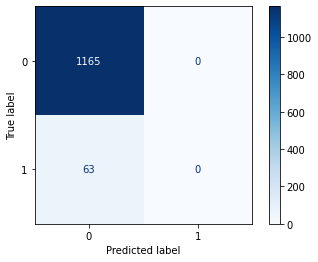

In [109]:
plot_confusion_matrix(DT_gs, X_test, y_test, cmap = 'Blues');

Accuracy of the model for the testing data (unseen to model) increased as well as the number of false positives (although that came as a sacrifice to the number of false negatives). 

**KNN model**

In [110]:
knn_pipe.fit(X_train, y_train)
print(f'KNN accuracy for the training data is {knn_pipe.score(X_train, y_train)*100} %')
print(f'KNN accuracy for the test data (unseen by model) is {knn_pipe.score(X_test, y_test)*100} %')


KNN accuracy for the training data is 100.0 %
KNN accuracy for the test data (unseen by model) is 92.34527687296416 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


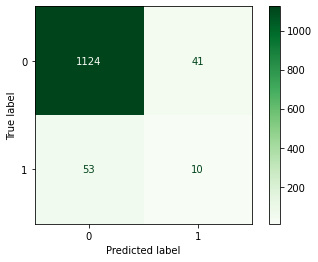

In [111]:
plot_confusion_matrix(knn_pipe, X_test, y_test, cmap = 'Greens')

A model that is 100% accurate on the training data and 92% accurate on the testing data suggests that it is most likely overfit.

We also see 53 false negatives and 41 false positives in the above correlation map.

Lets tune the model!

In [112]:
#adapted from mock exam solutions
knn_params = {'kneighborsclassifier__n_neighbors' : [1, 2, 10, 50],
              'kneighborsclassifier__leaf_size' : [1, 5, 20, 30, 40]}

knn_gs = GridSearchCV(knn_pipe, knn_params);

knn_gs.fit(X_train, y_train)

print(f'KNN accuracy for the training data is {knn_gs.score(X_train, y_train)*100} %')
print(f'KNN accuracy for the test data (unseen by model) is {knn_gs.score(X_test, y_test)*100} %')

KNN accuracy for the training data is 96.03368649823418 %
KNN accuracy for the test data (unseen by model) is 94.86970684039088 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


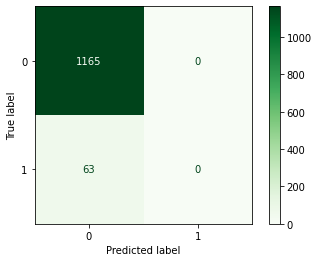

In [113]:
plot_confusion_matrix(knn_gs, X_test, y_test, cmap = 'Greens');

Accuracy of the model for the testing data (unseen to model) increased as well as the number of false positives (although that came as a sacrifice to the number of false negatives).

**Log. Regression**

In [114]:
logreg_pipe.fit(X_train,y_train)
print(f'LR accuracy for the training data is {logreg_pipe.score(X_train, y_train)*100} %')
print(f'LR accuracy for the test data (unseen by model) is {logreg_pipe.score(X_test, y_test)*100} %')

LR accuracy for the training data is 96.03368649823418 %
LR accuracy for the test data (unseen by model) is 94.86970684039088 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


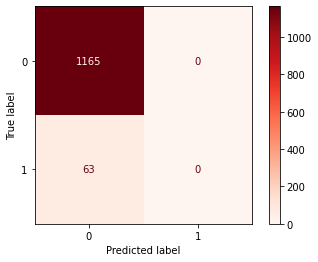

In [115]:
plot_confusion_matrix(logreg_pipe, X_test, y_test, cmap = 'Reds');

This model is already starting out better than the previous two. 

Lets tune to see how it changes. 

In [116]:
#hypertune the model (L1 regularization)
#adapted from learning platform 

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logreg_pipe = make_pipeline(column_transformer,pca,log_reg)
  logreg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9486970684039088,
 0.001: 0.9486970684039088,
 0.01: 0.9486970684039088,
 0.1: 0.9486970684039088,
 1: 0.9486970684039088,
 10: 0.9486970684039088,
 100: 0.9486970684039088,
 1000: 0.9486970684039088}

In [117]:
# create a list of c values and empty lists for scores
#adapted from learning platform 

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  logreg_pipe = make_pipeline(column_transformer,pca, log_reg)
  logreg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9486970684039088,
 0.001: 0.9486970684039088,
 0.01: 0.9486970684039088,
 0.1: 0.9486970684039088,
 1: 0.9486970684039088,
 10: 0.9486970684039088,
 100: 0.9486970684039088,
 1000: 0.9486970684039088}

In [118]:
log_reg = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')
logreg_pipe = make_pipeline(column_transformer,pca, log_reg)
logreg_pipe.fit(X_train, y_train)

print(f'LR accuracy for the training data is {logreg_pipe.score(X_train, y_train)*100} %')
print(f'LR accuracy for the test data (unseen by model) is {logreg_pipe.score(X_test, y_test)*100} %')

LR accuracy for the training data is 96.03368649823418 %
LR accuracy for the test data (unseen by model) is 94.86970684039088 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


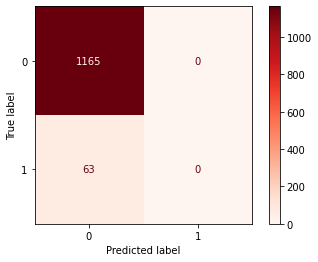

In [119]:
plot_confusion_matrix(logreg_pipe, X_test, y_test, cmap = 'Reds');

# Choose your "production" model and justify this decision

I think once again the Log. Regression model preformed the best out of the three models implemented in this project. It outpreformed both the decision tree and Knn models - even prior to being tuned as assessed by model preformance on the testing dataset (not 100% accurate - and thus not 'overfit') as well as predicted 0 false positives on the correlation map even prior to being fit. 

I would suggest clinitians use this model when tryiing to predict stroke but I would catution them that this model still tends to predict false positives (even though its a very minor precentage of predictions). 